# Replace this with your project title

Author:Derek Jiang

Course Project, UC Irvine, Math 10, F22

## Introduction

In this project, I will be using different stock prices and volume inside the dataset to predict different gas companies in the US, specifically, from 2015 to 2022. I will also perform some machine learning algorithms to find out which information play the most important role in determining the gas company names. Additionally, I will explore the relationship between these prices during the Covid Pandemic using different graphs and find out some interesting features.

## Preparation
In this section, I will perform basic data cleaning and sorting so I can obtain the data from 2015 to 2022
`

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from pandas.api.types import is_numeric_dtype

alt.data_transformers.enable('default', max_rows=20000)

DataTransformerRegistry.enable('default')

In [2]:
df = pd.read_csv("oil and gas stock prices.csv")
df.isna().any(axis=0)

Date        False
Symbol      False
Open        False
High        False
Low         False
Close       False
Volume      False
Currency    False
dtype: bool

We performed the above analysis to ensure there is any missing value that needs to be dropped in the dataset. We will also rename column "Symbol" to "Company" for better understanding.

In [3]:
df.rename(columns={"Symbol":"Company"},inplace=True)

In [4]:
df["Year"] = pd.to_datetime(df["Date"]).dt.year
df

Date Company   Open   High    Low  Close    Volume Currency  Year
0      2000-01-03     XOM  39.75  40.38  38.94  39.16  13458200      USD  2000
1      2000-01-04     XOM  38.69  39.09  38.25  38.41  14510800      USD  2000
2      2000-01-05     XOM  39.00  40.88  38.91  40.50  17485000      USD  2000
3      2000-01-06     XOM  40.31  42.91  40.09  42.59  19462000      USD  2000
4      2000-01-07     XOM  42.97  43.12  42.00  42.47  16603800      USD  2000
...           ...     ...    ...    ...    ...    ...       ...      ...   ...
39196  2022-06-06     SLB  47.79  48.00  46.88  47.22   6696970      USD  2022
39197  2022-06-07     SLB  47.00  49.08  46.87  48.93  14692203      USD  2022
39198  2022-06-08     SLB  49.00  49.83  48.08  49.57  15067131      USD  2022
39199  2022-06-09     SLB  48.79  49.16  48.10  48.14  11447491      USD  2022
39200  2022-06-10     SLB  47.17  47.88  46.52  47.21  11291267      USD  2022

[39201 rows x 9 columns]

In [5]:
df_sub = df[df["Year"]>=2015].copy()
df_sub

Date Company   Open   High    Low  Close    Volume Currency  Year
3773   2015-01-02     XOM  92.25  93.05  91.81  92.83  10220410      USD  2015
3774   2015-01-05     XOM  92.10  92.40  89.50  90.29  18502380      USD  2015
3775   2015-01-06     XOM  90.24  91.41  89.02  89.81  16670713      USD  2015
3776   2015-01-07     XOM  90.65  91.48  90.00  90.72  13590721      USD  2015
3777   2015-01-08     XOM  91.25  92.27  91.00  92.23  15487496      USD  2015
...           ...     ...    ...    ...    ...    ...       ...      ...   ...
39196  2022-06-06     SLB  47.79  48.00  46.88  47.22   6696970      USD  2022
39197  2022-06-07     SLB  47.00  49.08  46.87  48.93  14692203      USD  2022
39198  2022-06-08     SLB  49.00  49.83  48.08  49.57  15067131      USD  2022
39199  2022-06-09     SLB  48.79  49.16  48.10  48.14  11447491      USD  2022
39200  2022-06-10     SLB  47.17  47.88  46.52  47.21  11291267      USD  2022

[14992 rows x 9 columns]

In [6]:
df1= df_sub[df_sub["Year"]<2020].copy()
df2= df_sub[df_sub["Year"]>=2020].copy()

df1 and df2 are created for future use and reference.

## Use DecisionTreeClassifier to Predict

Here is the process of using DecisionTreeClassifier algorithm to predict the company names.

In [7]:
col = list(c for c in df.columns if is_numeric_dtype(df[c]) and c != "Year")
col

['Open', 'High', 'Low', 'Close', 'Volume']

In [8]:
X = df_sub[col]
y = df_sub["Company"]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9,random_state=0)

In [10]:
train_dict={}
test_dict={}

for n in range (10,300,10):
    clf = DecisionTreeClassifier(max_leaf_nodes=n, max_depth=10)
    clf.fit(X_train,y_train)
    c1 = clf.score(X_train,y_train)
    train_error = log_loss(y_train,clf.predict_proba(X_train))
    train_dict[n]=train_error
    c2 = clf.score(X_test,y_test)
    test_error = log_loss(y_test,clf.predict_proba(X_test))
    test_dict[n]=test_error
    print(c1,c2)

0.595612214645716 0.5653333333333334
0.6278535428402016 0.5873333333333334
0.633782982508153 0.5906666666666667
0.6420841980432849 0.592
0.6483101096946339 0.596
0.6537948413874889 0.602
0.6566113252297658 0.5986666666666667
0.6595760450637415 0.5926666666666667
0.6612807589682775 0.5993333333333334
0.6656537207233917 0.604
0.6680996145864215 0.606
0.6723243403498369 0.6053333333333333
0.6752149421879632 0.604
0.676697302104951 0.6046666666666667
0.6785502520011859 0.604
0.6801808479098725 0.6026666666666667
0.6815149718351616 0.604
0.6830714497479988 0.6
0.6847761636525348 0.598
0.6863326415653721 0.598
0.687444411503113 0.5966666666666667
0.6890008894159502 0.5973333333333334
0.6898161873702935 0.5973333333333334
0.6909279573080344 0.598
0.6917432552623777 0.596
0.6927809072042692 0.596
0.6935220871627631 0.5966666666666667
0.6942632671212571 0.596
0.6947820930922027 0.594


After getting the Classifier score, it is actually hard to tell if there is overfitting since testing score lingers between 0.59 and 0.6, and there is no decreasing trend. Therefore, we will use log_loss to decide.

In [11]:
train_dict

{10: 1.0812891154170061,
 20: 0.9896847563014075,
 30: 0.9382078193185537,
 40: 0.9169126035759071,
 50: 0.900539187588461,
 60: 0.8854427824277942,
 70: 0.8747012929417599,
 80: 0.8604820619732938,
 90: 0.8507974757172453,
 100: 0.8406493847623785,
 110: 0.8347866058173616,
 120: 0.8265968395583174,
 130: 0.8200357404579073,
 140: 0.8146304014111525,
 150: 0.8080306573315309,
 160: 0.802870039758331,
 170: 0.7983158465323297,
 180: 0.7937957863775058,
 190: 0.7895915500563069,
 200: 0.7854871396502136,
 210: 0.7820128042924549,
 220: 0.7784909600267844,
 230: 0.7748253598046382,
 240: 0.771312220805663,
 250: 0.7677814789705256,
 260: 0.7653361200115115,
 270: 0.7610058304789458,
 280: 0.7593816733219914,
 290: 0.7569965460923642}

In [12]:
test_dict

{10: 1.1328453247775379,
 20: 1.074657937019123,
 30: 1.1082730713990587,
 40: 1.1397578808616415,
 50: 1.1730913694552925,
 60: 1.1816878047851145,
 70: 1.1795811958089182,
 80: 1.2200310764935527,
 90: 1.3026991467011386,
 100: 1.2940687583226973,
 110: 1.2880236700166048,
 120: 1.373190401980762,
 130: 1.3735110697012538,
 140: 1.392618143384284,
 150: 1.4346567208537615,
 160: 1.4579187536755145,
 170: 1.4766685169505254,
 180: 1.5206393530926234,
 190: 1.5653699274293023,
 200: 1.6061985841473603,
 210: 1.655790868882344,
 220: 1.7400863735961696,
 230: 1.80452497020446,
 240: 1.8640202628351787,
 250: 1.9055340245139187,
 260: 1.9758916386215357,
 270: 2.0159316346527256,
 280: 2.0399387705014256,
 290: 2.1292321916787276}

From the log_loss result, we can see that after n=70, the testing error starts increasing drastically, so overfitting occurs after n=70.

In [13]:
clf=DecisionTreeClassifier(max_leaf_nodes=70, max_depth=10)


In [14]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=70)

In [15]:
clf.score(X_train,y_train)

0.6566113252297658

In [16]:
clf.score(X_test,y_test)

0.5986666666666667

In [17]:
arr = clf.predict(X_train)

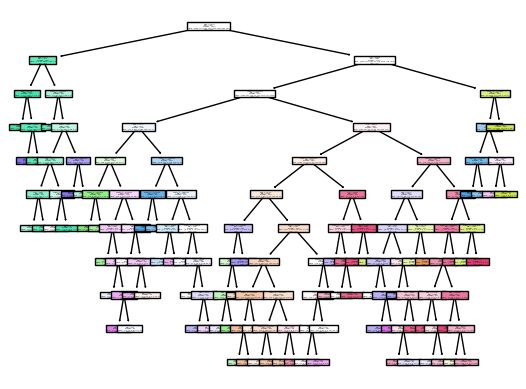

In [18]:
fig = plt.figure()
_= plot_tree(clf,
                  feature_names=clf.feature_names_in_,
                  class_names=clf.classes_,
                  filled = True)

## Use K-Nearest Neighbors Classifier to Predict


After using DecisionTreeClassifier, I want to see if there is a better Classifier algorithm that can be applied to this dataset, and I decide to try KNeighbor method with the guidance of additional classnotes

In [19]:
kcl = KNeighborsClassifier(n_neighbors=10)

In [20]:
kcl.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [21]:
kcl.score(X_train,y_train)

0.4293655499555292

In [22]:
def kscore(k):
    kcl = KNeighborsClassifier(n_neighbors=k)
    kcl.fit(X_train,y_train)
    a = kcl.score(X_train,y_train)
    b = kcl.score(X_test,y_test)
    return (a,b)

In [23]:
[kscore(10),kscore(20),kscore(30),kscore(40)]

[(0.4293655499555292, 0.2826666666666667),
 (0.39112066409724283, 0.3006666666666667),
 (0.3733323450933887, 0.31133333333333335),
 (0.36214052772013045, 0.31533333333333335)]

As we see from the result, the test score is considerably smaller than that of DecisionTreeClassifier, and so the prediction is not as accurate as DecisionTreeClassifier  

## Using DecisionTreeClassifier on df1

Now I will use DecisionTreeClassifier on datasets before and after the pandemic occured, and I want to find out two most important features in predicting the companies.

In [24]:
df1

Date Company   Open   High    Low  Close    Volume Currency  Year
3773   2015-01-02     XOM  92.25  93.05  91.81  92.83  10220410      USD  2015
3774   2015-01-05     XOM  92.10  92.40  89.50  90.29  18502380      USD  2015
3775   2015-01-06     XOM  90.24  91.41  89.02  89.81  16670713      USD  2015
3776   2015-01-07     XOM  90.65  91.48  90.00  90.72  13590721      USD  2015
3777   2015-01-08     XOM  91.25  92.27  91.00  92.23  15487496      USD  2015
...           ...     ...    ...    ...    ...    ...       ...      ...   ...
38580  2019-12-24     SLB  40.74  40.93  40.35  40.65   3860440      USD  2019
38581  2019-12-26     SLB  40.86  40.88  39.93  40.07   7629938      USD  2019
38582  2019-12-27     SLB  40.13  40.38  39.83  40.00   6769230      USD  2019
38583  2019-12-30     SLB  40.01  40.75  40.00  40.40   8159958      USD  2019
38584  2019-12-31     SLB  40.01  40.22  39.53  40.20  10649715      USD  2019

[10064 rows x 9 columns]

In [25]:
X1 = df1[col]
y1 = df1["Company"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,train_size=0.9,random_state=1)
clf1 = DecisionTreeClassifier(max_depth=9)
clf1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [27]:
clf1.score(X_train,y_train)

0.7330241801921166

In [28]:
clf1.score(X_test,y_test)

0.692154915590864

In [29]:
pd.Series(clf1.feature_importances_,index= clf1.feature_names_in_)

Open      0.188328
High      0.278792
Low       0.083583
Close     0.150710
Volume    0.298586
dtype: float64

## Using DecisionTreeClassifier on df2

In [30]:
df2

Date Company   Open   High    Low  Close    Volume Currency  Year
5031   2020-01-02     XOM  70.24  71.02  70.24  70.90  12406912      USD  2020
5032   2020-01-03     XOM  71.34  71.37  70.16  70.33  17390568      USD  2020
5033   2020-01-06     XOM  70.32  71.36  70.23  70.87  20082492      USD  2020
5034   2020-01-07     XOM  70.50  70.52  69.51  70.29  17496314      USD  2020
5035   2020-01-08     XOM  70.11  70.28  69.17  69.23  15140731      USD  2020
...           ...     ...    ...    ...    ...    ...       ...      ...   ...
39196  2022-06-06     SLB  47.79  48.00  46.88  47.22   6696970      USD  2022
39197  2022-06-07     SLB  47.00  49.08  46.87  48.93  14692203      USD  2022
39198  2022-06-08     SLB  49.00  49.83  48.08  49.57  15067131      USD  2022
39199  2022-06-09     SLB  48.79  49.16  48.10  48.14  11447491      USD  2022
39200  2022-06-10     SLB  47.17  47.88  46.52  47.21  11291267      USD  2022

[4928 rows x 9 columns]

In [31]:
X2 = df2[col]
y2 = df2["Company"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2,train_size=0.9,random_state=1)
clf2 = DecisionTreeClassifier(max_depth=5)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [33]:
clf2.score(X_train,y_train)

0.6426155580608793

In [34]:
clf2.score(X_test,y_test)

0.6085192697768763

In [35]:
pd.Series(clf2.feature_importances_,index= clf2.feature_names_in_)

Open      0.169637
High      0.370563
Low       0.021609
Close     0.000000
Volume    0.438191
dtype: float64

## High Price and Volume Relationship
Now we have seen that High Price and Volume play the two most important roles in predicting the companies. We want to explore the relationship between these two. 

In [36]:
c1 = alt.Chart(df1).mark_circle().encode(
    x = "High",
    y = "Volume",
    color = "Company",
    tooltip =["Date","High","Volume"],
).properties(
    title = "Before Covid"
)

c2 = alt.Chart(df2).mark_circle().encode(
    x = "High",
    y = "Volume",
    color = "Company",
    tooltip =["Date","High","Volume"],
).properties(
    title = "During Covid"
)

In [37]:
alt.concat(c1,c2)

alt.ConcatChart(...)

From the graphs, it is clear that before covid happened, Volume values stay relatively low no matter how High price changes. After covid, Volume drastically rised up, but we cannot exactly explain the relationship yet.

In [38]:
sel = alt.selection_single(fields=["Company"],bind="legend")
c3 = alt.Chart(df2).mark_circle().encode(
    x = "High",
    y = "Volume",
    color = alt.condition(sel,"Company",alt.value("lightgrey")),
    opacity =alt.condition(sel,alt.value(1),alt.value(0.1)),
    tooltip =["Date","High","Volume"],
).properties(
    title = "During Covid"
).add_selection(sel)
c3

alt.Chart(...)

By using selection on Company, every company's data point can be seen in the graph, but it is still not the best visual effect. 

In [39]:
c4 = alt.Chart(df2).mark_circle().encode(
    x = "High",
    y = "Volume",
    color = "Year",
    tooltip =["Date","High","Volume"],
).properties(
    height = 200,
    width = 200,
).facet(
    column = "Company"
)
c4

alt.FacetChart(...)

Using Facet gives a very clear view of each company's volume and high price relationship from 2020-2022. The majority of the companeis stock volume were high at low high price at 2020, and as time went on and high price went up, volume stayed roughly the same or gradually decreased.

Now, we want to use the predicted Companies to plot and see the relationship between High Price and Volume in df2

In [40]:
df3 = pd.DataFrame()
df3["Pred"]=clf2.predict(X_test)

In [41]:
h1=[]
h2=[]
h3=[]
h4=[]
h5=[]
h6=[]
h7=[]
for i in X_test.index:
    h1.append(df2.loc[i,"Date"])
    h2.append(df2.loc[i,"Open"])
    h3.append(df2.loc[i,"High"])
    h4.append(df2.loc[i,"Low"])
    h5.append(df2.loc[i,"Close"])
    h6.append(df2.loc[i,"Volume"])
    h7.append(df2.loc[i,"Company"])


In [42]:
df3["Date"]=h1
df3["Open"]=h2
df3["High"]=h3
df3["Low"]=h4
df3["Close"]=h5
df3["Volume"]=h6
df3["Company"]=h7
df3

Pred        Date   Open   High    Low  Close    Volume Company
0    MRO  2020-07-31   5.48   5.54   5.36   5.49  21249456     MRO
1    VLO  2021-03-08  80.00  82.60  79.54  80.56   4834572     VLO
2    VLO  2021-11-02  78.10  79.97  77.55  77.55   4544319     PSX
3    XOM  2021-12-17  70.90  71.10  68.50  68.61  22942540     COP
4    CVX  2020-08-13  89.87  91.28  89.76  89.82   7314642     CVX
..   ...         ...    ...    ...    ...    ...       ...     ...
488  CVX  2022-01-28  86.16  89.20  81.98  84.25   6743044     PSX
489  MRO  2020-06-18  19.31  20.23  19.19  20.18  15867733     SLB
490  XOM  2022-04-12  85.71  86.82  85.38  85.60  22020304     XOM
491  COP  2021-08-30  60.33  60.49  58.87  58.93   6128928     MPC
492  MPC  2021-01-21  46.20  46.46  45.01  45.39   5204738     MPC

[493 rows x 8 columns]

In [43]:
sel = alt.selection_single(fields=["Pred"])
c5 = alt.Chart(df3).mark_line().encode(
    x = "High",
    y = "Volume",
    color = alt.condition(sel,"Pred",alt.value("lightgrey")),
    opacity =alt.condition(sel,alt.value(1),alt.value(0.1)),
    tooltip =["Date","High","Volume"],
).properties(
    title = "During Covid(Predicted)"
).add_selection(sel)

c6 = alt.Chart(df3).mark_line().encode(
    x = "High",
    y = "Volume",
    color = alt.condition(sel,"Company",alt.value("lightgrey")),
    opacity =alt.condition(sel,alt.value(1),alt.value(0.1)),
    tooltip =["Date","High","Volume"],
).properties(
    title = "During Covid(Original)"
).add_selection(sel)

alt.concat(c5,c6)

alt.ConcatChart(...)

Comparing the predicted one with original one, the overall trend still matched well. The accuracy can be calculated as below, which corresponds to the test score. And the highest volume occured on 03/09/2022 on both graphs.

In [44]:
(df3["Pred"]==df3["Company"]).sum()/df3.shape[0]

0.6085192697768763

## Additional Findings
After seeing the relationship between Volume and High Price, I want to use another way to show the date on which the highest volume occured and explore which High Price occured the most frequently in df2. To do this, I will include some codes reference learned from Kaggle.

In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

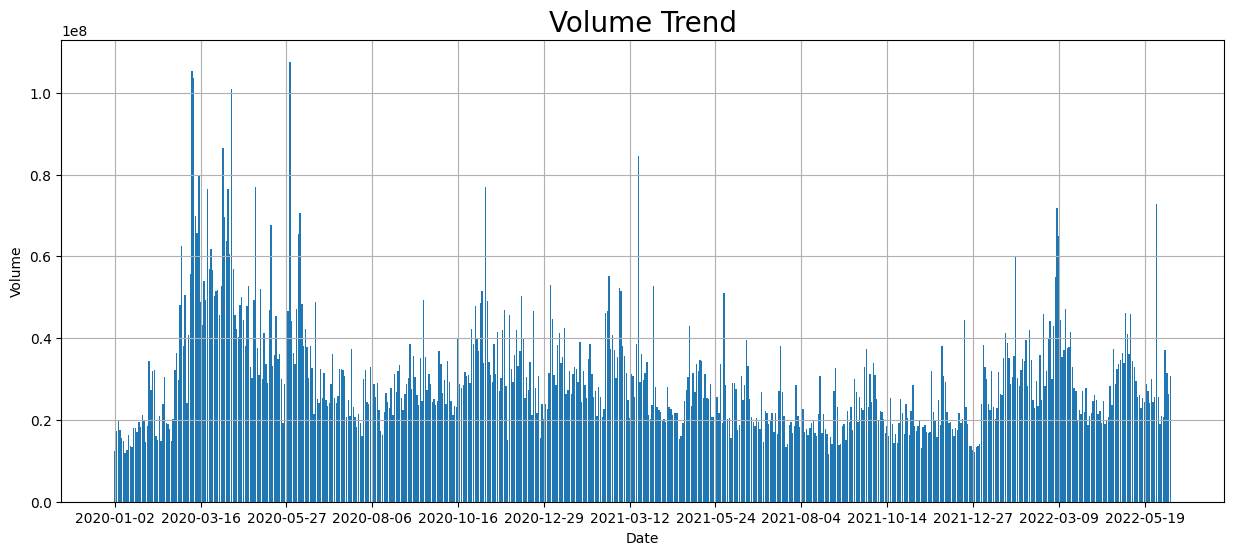

In [46]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.bar(df2["Date"], df2["Volume"])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel("Date", fontsize = 10)
ax.set_ylabel("Volume", fontsize = 10)
plt.title('Volume Trend', fontsize = 20)
plt.grid()
plt.show()

The above graph is a volume trend of original df2 data, and we can see that one top volume occured slightly before 03/16/2020, which still corresponds to the above result found in the graph 

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
Maximum High price of stock ever obtained: 182.4
Minimum High price of stock ever obtained: 3.29


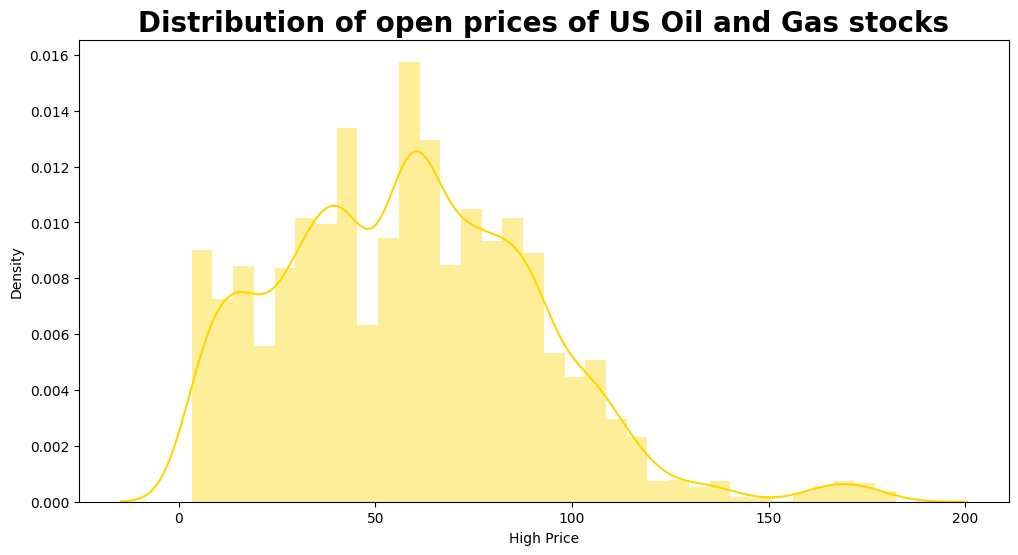

In [47]:
plt.figure(figsize = (12, 6))
sns.distplot(df2["High"], color= "#FFD500")
plt.title("Distribution of open prices of US Oil and Gas stocks", fontweight = "bold", fontsize = 20)
plt.xlabel("High Price", fontsize = 10)

print("Maximum High price of stock ever obtained:", df2["High"].max())
print("Minimum High price of stock ever obtained:", df2["High"].min())

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
Maximum High price of stock ever obtained: 180.64
Minimum High price of stock ever obtained: 4.14


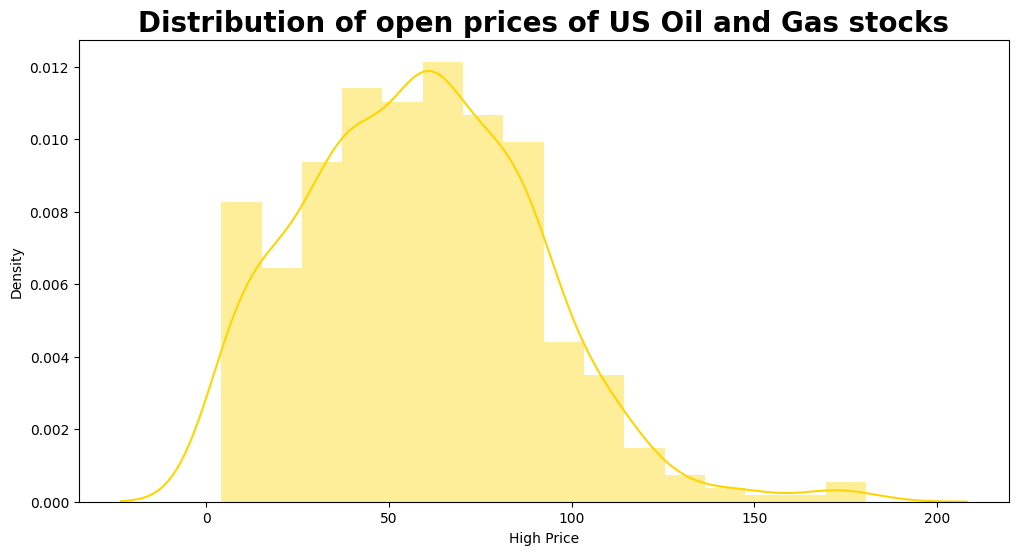

In [48]:
plt.figure(figsize = (12, 6))
sns.distplot(df3["High"], color= "#FFD500")
plt.title("Distribution of open prices of US Oil and Gas stocks", fontweight = "bold", fontsize = 20)
plt.xlabel("High Price", fontsize = 10)

print("Maximum High price of stock ever obtained:", df3["High"].max())
print("Minimum High price of stock ever obtained:", df3["High"].min())


From both distribution graphs, we can see that the High Price that occurs the most stays around 60. The predicted graph does a good job showing this interesting fact.

## Summary

Either summarize what you did, or summarize the results.  Maybe 3 sentences.

DecisionTreeClassifier, as a more accurate algorithm compared with K-Nearest Neighbors Classifier, helped me predict the companies using different stock prices and volume. Through exploring the relationship between High Price and Volume, I came to see both overall trend and individual trend of each company. Besides, I found out the date on which the highest volume occurs and the most frequently occured High Price.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

This Dataset is from Kaggle: https://www.kaggle.com/datasets/prasertk/oil-and-gas-stock-prices

* List any other references that you found helpful.

Reference 1: https://christopherdavisuci.github.io/UCI-Math-10-W22/Week6/Week6-Wednesday.html
This is used as a guide to predict companies in the dataset

Reference 2: https://www.kaggle.com/code/mattop/major-us-oil-and-gas-stock-price-eda 
I borrowed the codes of volume trending and the Distribution of High Price to graph 

## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3b82a602-1ff4-4142-b60b-fd908347f8fd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>